In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score,f1_score

from imblearn.over_sampling import SMOTE

import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('dataset_v1.csv')
df

,destinationCity,distance,itemCategoryName,itemWeight,originCity,vehicleGroupName,tripFeeAmount
0,Jakarta Utara,28.1,Barang Jadi,32.0,Jakarta Utara,Trailer Dry Container 40 Feet,1650000.0
1,Jakarta Utara,15.6,Barang Jadi,15.0,Jakarta Timur,Trailer Dry Container 20 Feet,750000.0
2,Jakarta Utara,51.8,Barang Jadi,15.0,Bogor,Trailer Dry Container 20 Feet,1350000.0
3,Jakarta Utara,52.6,Barang Jadi,15.0,Tangerang,Trailer Dry Container 20 Feet,1500000.0
4,Jakarta Utara,29.4,Barang Jadi,15.0,Tangerang,Trailer Dry Container 40 Feet,1500000.0
...,...,...,...,...,...,...,...
10639,Semarang,440.0,Barang Jadi,10.0,Bandung,Fuso Box,6700000.0
10640,Surabaya,781.0,Barang Jadi,16.0,Bandung,Tronton Wingbox,7500000.0
10641,Yogyakarta,560.0,Barang Jadi,16.0,Bandung,Tronton Wingbox,6500000.0
10642,Yogyakarta,560.0,Barang Jadi,16.0,Bandung,Tronton Wingbox,6500000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10644 entries, 0 to 10643
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   destinationCity   10644 non-null  object 
 1   distance          10644 non-null  float64
 2   itemCategoryName  10644 non-null  object 
 3   itemWeight        10644 non-null  float64
 4   originCity        10644 non-null  object 
 5   vehicleGroupName  10644 non-null  object 
 6   tripFeeAmount     10644 non-null  float64
dtypes: float64(3), object(4)
memory usage: 582.2+ KB


In [4]:
print(len(df['vehicleGroupName'].value_counts()))
df['vehicleGroupName'].unique()

26


array(['Trailer Dry Container 40 Feet', 'Trailer Dry Container 20 Feet',
       'CDD Box', 'CDD Bak', 'Tronton Wingbox', 'Blind Van',
       'CDD Long Box', 'CDD Wingbox', 'Fuso Bak', 'Tronton Box',
       'Fuso Box', 'Trailer Chiller Container 40 Feet', 'Fuso Jumbo',
       'Tronton Bak', 'CDE Box', 'CDE Bak', 'Fuso Tronton',
       'CDD Long Bak', 'Pick Up Box', 'CDD Chiller', 'Low Bed',
       'Self Loader', 'High Bed', 'Pick Up Bak', 'CDD Los Bak',
       'Tronton Dump Truck'], dtype=object)

#  Size of the training data
It is usually recommended to gather a good amount of data to get reliable predictions. However, many a time, the availability of data is a constraint. So, if the training data is smaller or if the dataset has a fewer number of observations and a higher number of features like genetics or textual data, choose algorithms with high bias/low variance like Linear regression, Naïve Bayes, or Linear SVM.

If the training data is sufficiently large and the number of observations is higher as compared to the number of features, one can go for low bias/high variance algorithms like KNN, Decision trees, or kernel SVM.

# Accuracy and/or Interpretability of the output

Now, to use which algorithm depends on the objective of the business problem. If <b>inference is the goal, then restrictive models are better</b> as they are much more interpretable. <b>Flexible models are better if higher accuracy</b> is the goal. In general, as the flexibility of a method increases, its interpretability decreases.

Accuracy and Explainability
Model performance is estimated in terms of its accuracy to predict the occurrence of an event on unseen data. A more accurate model is seen as a more valuable model.

Model interpretability provides insight into the relationship between in the inputs and the output. An interpreted model can answer questions as to why the independent features predict the dependent attribute.

The issue arises because as model accuracy increases so does model complexity, at the cost of interpretability.

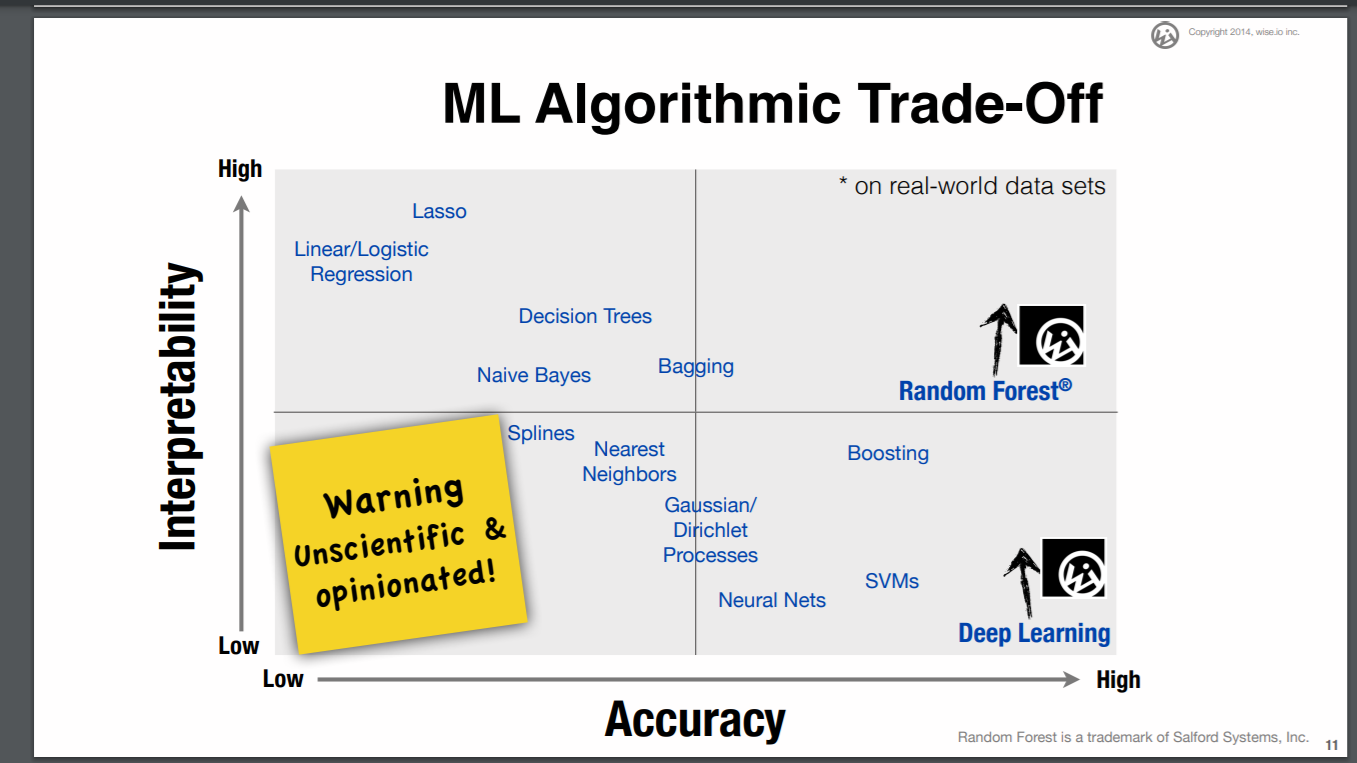

Random Forest, SVM , decision tree

In [5]:
for col in df.columns:
    col_type = df[col].dtype
    if col_type == 'object' or col_type.name == 'category':
        df[col] = df[col].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10644 entries, 0 to 10643
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   destinationCity   10644 non-null  category
 1   distance          10644 non-null  float64 
 2   itemCategoryName  10644 non-null  category
 3   itemWeight        10644 non-null  float64 
 4   originCity        10644 non-null  category
 5   vehicleGroupName  10644 non-null  category
 6   tripFeeAmount     10644 non-null  float64 
dtypes: category(4), float64(3)
memory usage: 300.0 KB


In [7]:
X = df.drop(['tripFeeAmount','vehicleGroupName'], axis=1)
y = df['vehicleGroupName']

In [8]:
num_features = X.select_dtypes(include="float")
categorical_features = X.select_dtypes(include="category")
cat_cols_OHE=pd.get_dummies(categorical_features)

In [9]:
result = [num_features,cat_cols_OHE]
X2 = pd.concat(result, axis=1, join='inner')

In [10]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=y,columns="count")     

train_outcome

col_0,count
vehicleGroupName,
Blind Van,37
CDD Bak,500
CDD Box,1146
CDD Chiller,7
CDD Long Bak,57
CDD Long Box,588
CDD Los Bak,1
CDD Wingbox,46
CDE Bak,217


<AxesSubplot:>

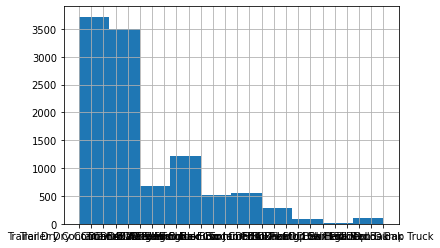

In [11]:
y.hist()

# Split training dan data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8515, 167) (2129, 167) (8515,) (2129,)


In [13]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001,0.00001,10]}

In [15]:

classifiers = [[RandomForestClassifier(),'Random Forest'], [DecisionTreeClassifier(), 'DecisionTreeClassifier']]

accuracy_list = []
precision_list = []
recall_list = []
f1score_list = []

for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    cls= model.fit(X_train, y_train)
    
    pred = cls.predict(X_test)

    accuracy = accuracy_score(y_test,pred)
#     precision = precision_score(y_test,pred) 
#     recall= recall_score(y_test,pred) 
#     f1score= f1_score(y_test,pred)

   
    
    accuracy_list.append(accuracy)
#     precision_list.append(precision)
#     recall_list.append(recall)
#     f1score_list.append(f1score)
    
   
    print(model_name, 'Accuracy:     ' + str(round(accuracy*100, 2)) + '%')
#     print(model_name,'Precision:    '+ str(round(precision*100, 2)) + '%')
#     print(model_name,'Recall:    '+ str(round(recall*100, 2)) + '%')
#     print(model_name,'F1-Score:    '+ str(round(f1score*100, 2)) + '%')
    
    print("\n")


Random Forest Accuracy:     83.51%


DecisionTreeClassifier Accuracy:     82.86%


